### "I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."


In [189]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import classification_report
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [133]:
from keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [134]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

(X_train, X_valid) = X_train[5000:], X_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000] 

print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("x_valid shape: ", X_valid.shape)

x_train shape:  (55000, 28, 28)
x_test shape:  (10000, 28, 28)
x_valid shape:  (5000, 28, 28)


In [135]:
values, counts = np.unique(y_train, return_counts=True)
print(np.asarray((values, counts)).T)

[[   0 5543]
 [   1 5444]
 [   2 5496]
 [   3 5499]
 [   4 5512]
 [   5 5507]
 [   6 5507]
 [   7 5488]
 [   8 5510]
 [   9 5494]]


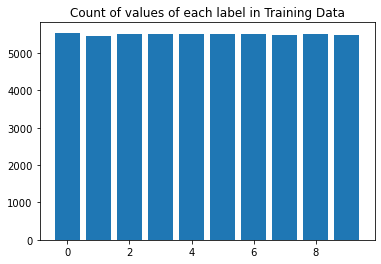

In [136]:
plt.bar(values, counts)
plt.title("Count of values of each label in Training Data")
plt.show()

[[   0 1000]
 [   1 1000]
 [   2 1000]
 [   3 1000]
 [   4 1000]
 [   5 1000]
 [   6 1000]
 [   7 1000]
 [   8 1000]
 [   9 1000]]


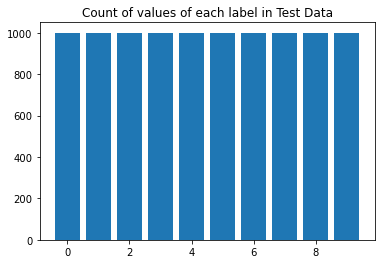

In [137]:
values, counts = np.unique(y_test, return_counts=True)
print(np.asarray((values, counts)).T)

plt.bar(values, counts)
plt.title("Count of values of each label in Test Data")
plt.show()

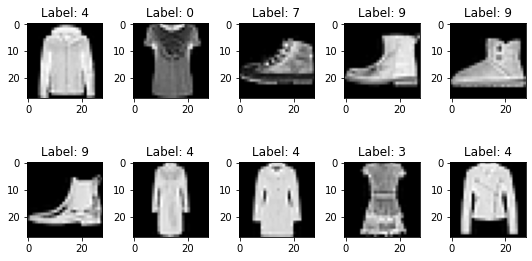

In [140]:
# visualise the top few rows of X_train

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))
for i in range(2):
    for j in range(5):
        ax = axes[i, j]
        ax.imshow(X_train[i*5+j], cmap='gray')
        ax.set_title('Label: {}'.format(y_train[i*5+j]))
plt.tight_layout()
plt.show()

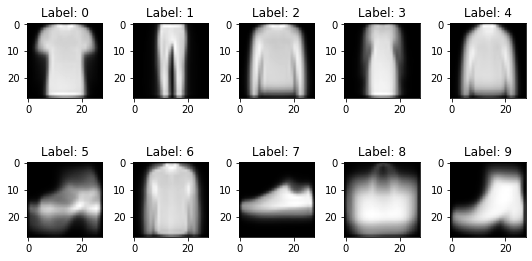

In [141]:
# Plotting the mean of all images for each label

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))

X_train_mean = np.zeros((10, 28, 28))

for i in range(2):
      for j in range(5):
        X_train_mean[i*5+j, :, :] = np.mean(X_train[np.where(y_train == i*5+j)[0], :, :], axis=0)
        ax = axes[i, j]
        ax.imshow(X_train_mean[i*5+j, :, :], cmap='gray')
        ax.set_title('Label: {}'.format(i*5+j))

plt.tight_layout()   
plt.show()

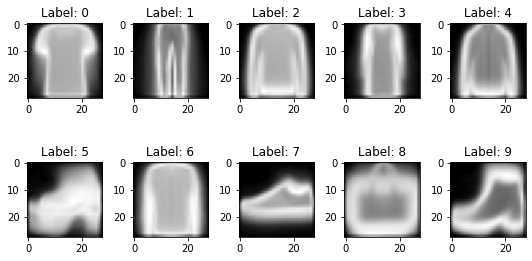

In [142]:
# Plotting the mean of all images for each label

fig, axes = plt.subplots(2, 5, figsize=(1.5*5,2*2))

X_train_mean = np.zeros((10, 28, 28))

for i in range(2):
      for j in range(5):
        X_train_mean[i*5+j, :, :] = np.std(X_train[np.where(y_train == i*5+j)[0], :, :], axis=0)
        ax = axes[i, j]
        ax.imshow(X_train_mean[i*5+j, :, :], cmap='gray')
        ax.set_title('Label: {}'.format(i*5+j))

plt.tight_layout()   
plt.show()

In [160]:
mean = np.mean(X_train)
std = np.std(X_train)
X_train = (X_train-mean)/(std+1e-7)
X_valid = (X_valid-mean)/(std+1e-7)
X_test = (X_test-mean)/(std+1e-7)

num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_valid = tf.keras.utils.to_categorical(y_valid,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes)

In [161]:
img_rows, img_cols = 28, 28

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

print('image input shape: ', input_shape)
print('x_train shape:', X_train.shape)

image input shape:  (28, 28, 1)
x_train shape: (55000, 28, 28, 1)


In [23]:
model = keras.models.Sequential([
          keras.layers.Conv2D(filters=6, kernel_size=5, 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=5, 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=5, 
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_6 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 128)       19328     
_________________________________________________________________
average_pooling2d_7 (Average (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 120)         384120    
_________________________________________________________________
flatten_3 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 84)               

In [24]:
def lr_schedule(epochs):
    if epochs < 2:
        lr = 5e-4
    else:
        lr = 1e-5
    return lr

In [25]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import regularizers, optimizers
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 

In [26]:
from tensorflow.keras.optimizers import Adam

model.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [27]:
hist = model.fit(X_train, y_train, batch_size= 32, epochs= 20,callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 65s 38ms/step - loss: 0.4339 - accuracy: 0.8418 - val_loss: 0.3002 - val_accuracy: 0.8910
Epoch 2/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2871 - accuracy: 0.8957 - val_loss: 0.2671 - val_accuracy: 0.8980
Epoch 3/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2152 - accuracy: 0.9205 - val_loss: 0.2310 - val_accuracy: 0.9142
Epoch 4/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.2043 - accuracy: 0.9247 - val_loss: 0.2275 - val_accuracy: 0.9176
Epoch 5/20
1719/1719 [==============================] - 37s 21ms/step - loss: 0.1990 - accuracy: 0.9266 - val_loss: 0.2257 - val_accuracy: 0.9178
Epoch 6/20
1719/1719 [==============================] - 37s 22ms/step - loss: 0.1950 - accuracy: 0.9283 - val_loss: 0.2241 - val_accuracy: 0.9186
Epoch 7/20
1719/1719 [==============================] - 37s 22ms/step - loss: 0.1915 - accuracy: 0.9299 - val_loss: 0.2235 -

In [28]:
score = model.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2405 - accuracy: 0.9139
Test loss: 0.24051982164382935
Test accuracy: 0.9139000177383423


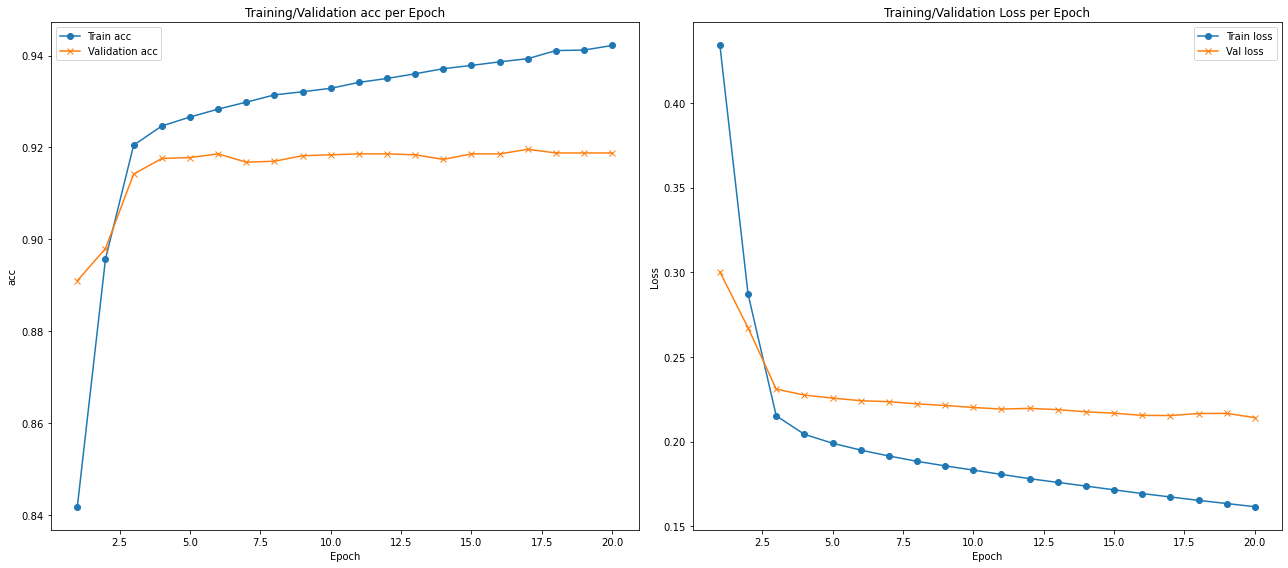

In [29]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist.history['accuracy'], 'o-')
ax[0].plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist.history['loss'], 'o-')
ax[1].plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [25]:
predicted_classes = model.predict(X_test)
predicted_classes = np.argmax(predicted_classes, axis=1)

In [26]:
test_img = X_test[0]
prediction = model.predict(X_test)
prediction[0]

array([2.48585138e-06, 2.93873903e-09, 3.72841740e-08, 1.01539435e-08,
       3.55955443e-08, 1.03060843e-03, 4.50930600e-07, 1.81436688e-02,
       2.64841565e-05, 9.80796099e-01], dtype=float32)

In [27]:
np.argmax(prediction[0])


9

### Changing Kernel size

In [35]:
model1 = keras.models.Sequential([
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model1.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_12 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_6 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 84)               

In [36]:
def lr_schedule(epochs):
    if epochs < 2:
        lr = 5e-4
    else:
        lr = 1e-5
    return lr

In [37]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model1.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy']) 

In [38]:
from tensorflow.keras.optimizers import Adam

#adam = Adam(lr = 0.001, decay = 1e-3)
model1.compile(loss ='categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])

In [39]:
hist1 = model1.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4411 - accuracy: 0.8409 - val_loss: 0.3378 - val_accuracy: 0.8804
Epoch 2/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2933 - accuracy: 0.8929 - val_loss: 0.2874 - val_accuracy: 0.8962
Epoch 3/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2270 - accuracy: 0.9180 - val_loss: 0.2454 - val_accuracy: 0.9100
Epoch 4/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2170 - accuracy: 0.9208 - val_loss: 0.2414 - val_accuracy: 0.9116
Epoch 5/20
1719/1719 [==============================] - 21s 12ms/step - loss: 0.2124 - accuracy: 0.9224 - val_loss: 0.2388 - val_accuracy: 0.9124
Epoch 6/20
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2088 - accuracy: 0.9236 - val_loss: 0.2368 - val_accuracy: 0.9132
Epoch 7/20
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2058 - accuracy: 0.9248 - val_loss: 0.2355 -

In [40]:
score = model1.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.2491 - accuracy: 0.9099
Test loss: 0.24905934929847717
Test accuracy: 0.9099000096321106


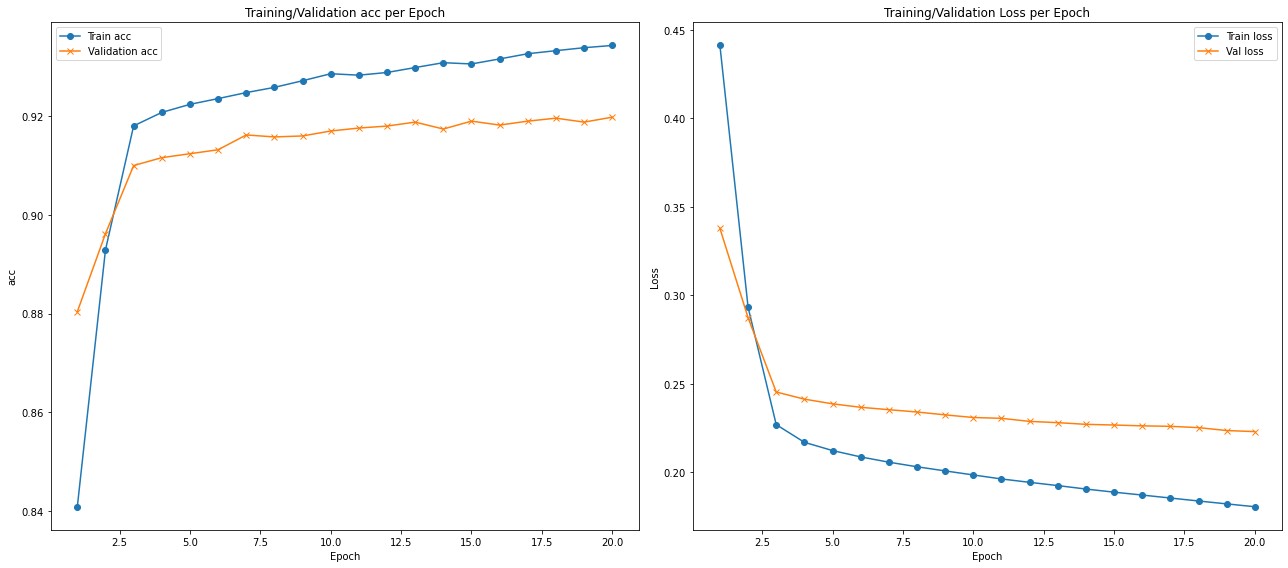

In [41]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist.history['accuracy'], 'o-')
ax[0].plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist.history['loss'], 'o-')
ax[1].plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [43]:
model2 = keras.models.Sequential([
          keras.layers.Conv2D(filters=6, kernel_size=(7,7), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(7,7), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(7,7),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 28, 28, 6)         300       
_________________________________________________________________
average_pooling2d_16 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 14, 14, 128)       37760     
_________________________________________________________________
average_pooling2d_17 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 7, 7, 120)         752760    
_________________________________________________________________
flatten_8 (Flatten)          (None, 5880)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 84)               

In [44]:
def lr_schedule(epochs):
    if epochs < 2:
        lr = 5e-4
    else:
        lr = 1e-5
    return lr

In [45]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model2.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy']) 

In [47]:
hist2 = model2.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 82s 48ms/step - loss: 0.4234 - accuracy: 0.8462 - val_loss: 0.3177 - val_accuracy: 0.8816
Epoch 2/20
1719/1719 [==============================] - 83s 48ms/step - loss: 0.2838 - accuracy: 0.8947 - val_loss: 0.2591 - val_accuracy: 0.9056
Epoch 3/20
1719/1719 [==============================] - 83s 48ms/step - loss: 0.2077 - accuracy: 0.9233 - val_loss: 0.2358 - val_accuracy: 0.9128
Epoch 4/20
1719/1719 [==============================] - 82s 48ms/step - loss: 0.1961 - accuracy: 0.9277 - val_loss: 0.2315 - val_accuracy: 0.9148
Epoch 5/20
1719/1719 [==============================] - 81s 47ms/step - loss: 0.1897 - accuracy: 0.9305 - val_loss: 0.2296 - val_accuracy: 0.9136
Epoch 6/20
1719/1719 [==============================] - 81s 47ms/step - loss: 0.1850 - accuracy: 0.9323 - val_loss: 0.2278 - val_accuracy: 0.9152
Epoch 7/20
1719/1719 [==============================] - 82s 48ms/step - loss: 0.1806 - accuracy: 0.9332 - val_loss: 0.2265 -

In [48]:
score = model2.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 12ms/step - loss: 0.2443 - accuracy: 0.9153
Test loss: 0.24434946477413177
Test accuracy: 0.9153000116348267


### This was the best accuracy we got 91.53%

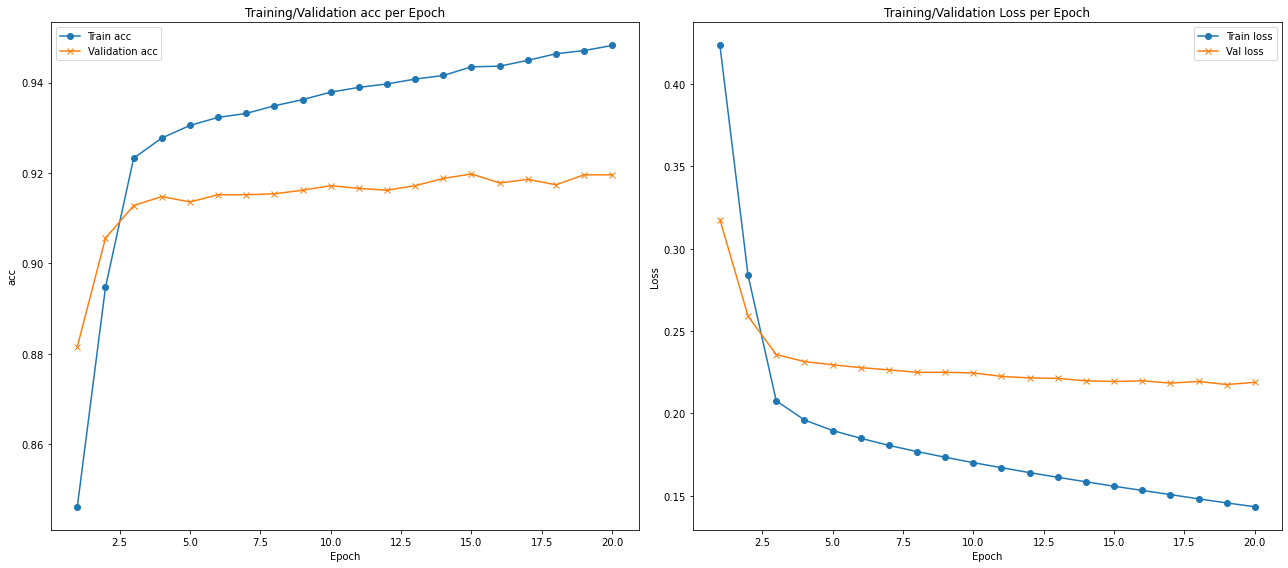

In [127]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist.history['accuracy'], 'o-')
ax[0].plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist.history['loss'], 'o-')
ax[1].plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [68]:
# Changing the padding 
model3 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model3.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_32 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_33 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_16 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 84)              

In [71]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model3.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy']) 

In [72]:
hist3 = model3.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 29s 16ms/step - loss: 0.4448 - accuracy: 0.8377 - val_loss: 0.3165 - val_accuracy: 0.8908
Epoch 2/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.3051 - accuracy: 0.8877 - val_loss: 0.2716 - val_accuracy: 0.8998
Epoch 3/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2373 - accuracy: 0.9119 - val_loss: 0.2484 - val_accuracy: 0.9082
Epoch 4/20
1719/1719 [==============================] - 28s 16ms/step - loss: 0.2261 - accuracy: 0.9169 - val_loss: 0.2449 - val_accuracy: 0.9098
Epoch 5/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2211 - accuracy: 0.9183 - val_loss: 0.2430 - val_accuracy: 0.9114
Epoch 6/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2174 - accuracy: 0.9197 - val_loss: 0.2412 - val_accuracy: 0.9112
Epoch 7/20
1719/1719 [==============================] - 27s 16ms/step - loss: 0.2142 - accuracy: 0.9208 - val_loss: 0.2397 -

In [73]:
score = model3.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.2577 - accuracy: 0.9095
Test loss: 0.2576882541179657
Test accuracy: 0.909500002861023


### Changing Padding

In [74]:
# Changing the padding 
model4 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='random_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model4.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_51 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_34 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_35 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_17 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 84)              

In [76]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model4.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy']) 

In [77]:
hist4 = model4.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.5049 - accuracy: 0.8163 - val_loss: 0.3537 - val_accuracy: 0.8760
Epoch 2/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.3267 - accuracy: 0.8805 - val_loss: 0.2892 - val_accuracy: 0.8948
Epoch 3/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2653 - accuracy: 0.9029 - val_loss: 0.2651 - val_accuracy: 0.9040
Epoch 4/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2564 - accuracy: 0.9061 - val_loss: 0.2607 - val_accuracy: 0.9046
Epoch 5/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2522 - accuracy: 0.9076 - val_loss: 0.2586 - val_accuracy: 0.9058
Epoch 6/20
1719/1719 [==============================] - 29s 17ms/step - loss: 0.2489 - accuracy: 0.9090 - val_loss: 0.2573 - val_accuracy: 0.9062
Epoch 7/20
1719/1719 [==============================] - 30s 18ms/step - loss: 0.2463 - accuracy: 0.9097 - val_loss: 0.2556 -

In [78]:
score = model4.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.2694 - accuracy: 0.9003
Test loss: 0.2694462835788727
Test accuracy: 0.9003000259399414


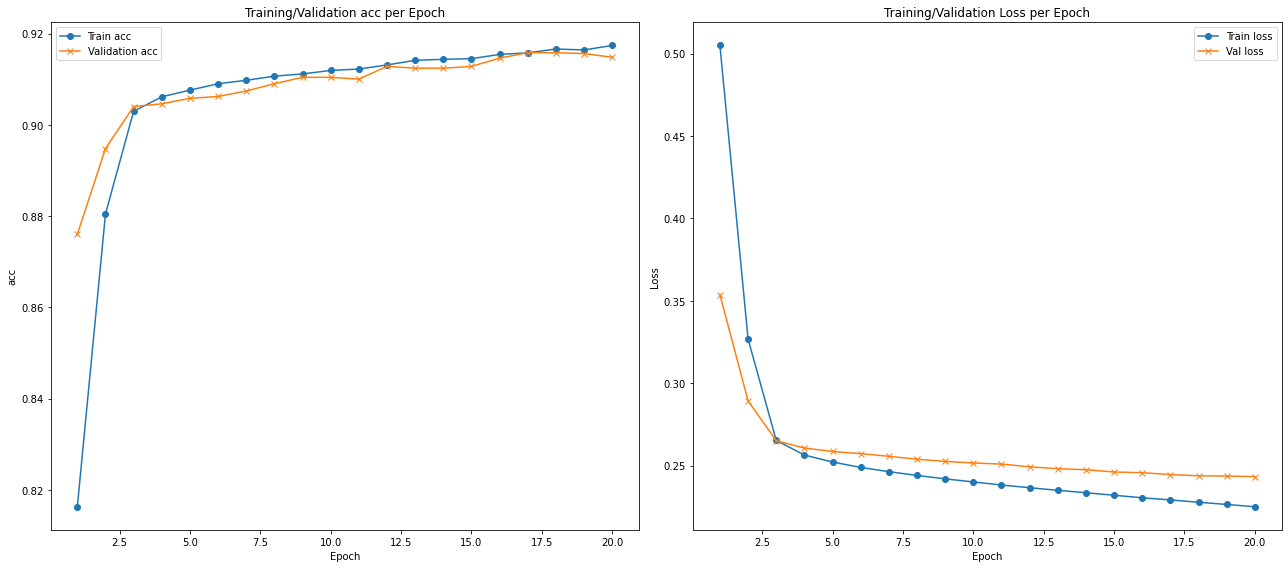

In [183]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist4.history['accuracy'], 'o-')
ax[0].plot([None] + hist4.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist4.history['loss'], 'o-')
ax[1].plot([None] + hist4.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [79]:
# Changing the kernel_initializer

model5 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='GlorotNormal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model5.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_36 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_37 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_18 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 84)              

In [80]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model5.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy']) 

In [82]:
hist5 = model5.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.4763 - accuracy: 0.8267 - val_loss: 0.3481 - val_accuracy: 0.8768
Epoch 2/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.3129 - accuracy: 0.8856 - val_loss: 0.2949 - val_accuracy: 0.8912
Epoch 3/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2487 - accuracy: 0.9090 - val_loss: 0.2606 - val_accuracy: 0.9028
Epoch 4/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2387 - accuracy: 0.9128 - val_loss: 0.2579 - val_accuracy: 0.9038
Epoch 5/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.2344 - accuracy: 0.9149 - val_loss: 0.2560 - val_accuracy: 0.9052
Epoch 6/20
1719/1719 [==============================] - 32s 19ms/step - loss: 0.2311 - accuracy: 0.9160 - val_loss: 0.2540 - val_accuracy: 0.9058
Epoch 7/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.2283 - accuracy: 0.9171 - val_loss: 0.2517 -

In [83]:
score = model5.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.2593 - accuracy: 0.9057
Test loss: 0.2592749297618866
Test accuracy: 0.9057000279426575


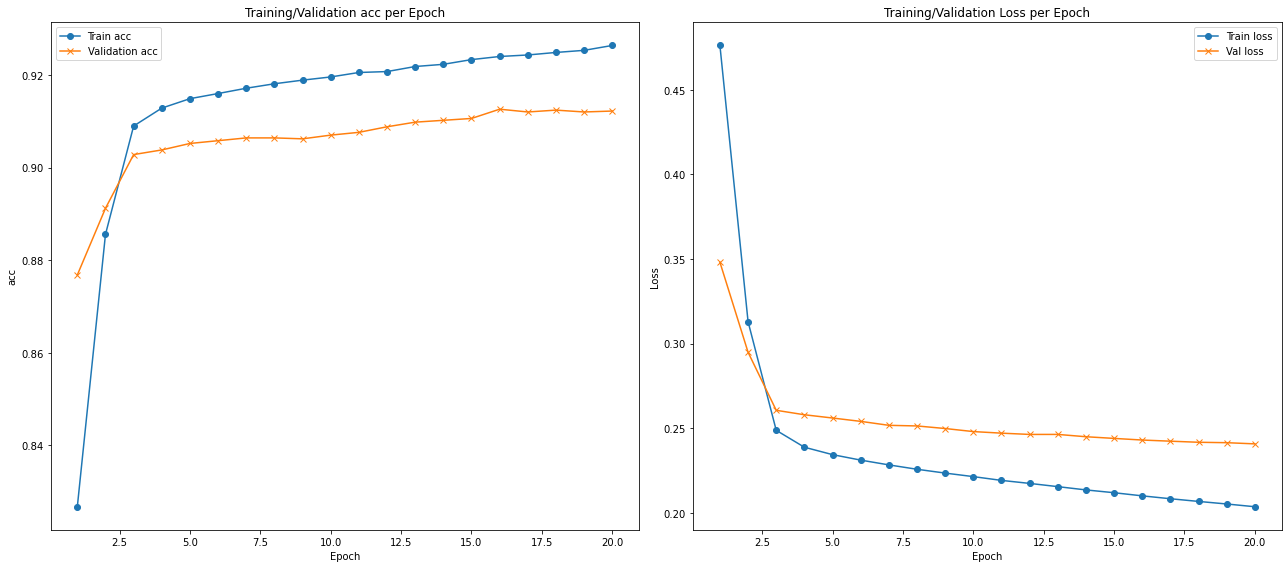

In [182]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist5.history['accuracy'], 'o-')
ax[0].plot([None] + hist5.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist5.history['loss'], 'o-')
ax[1].plot([None] + hist5.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [93]:
# Changing the kernel_initializer

model6 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='HeUniform',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model6.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_40 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_41 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_20 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 84)              

In [94]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model6.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy']) 

In [95]:
hist6 = model6.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 44s 25ms/step - loss: 0.4637 - accuracy: 0.8296 - val_loss: 0.3188 - val_accuracy: 0.8910
Epoch 2/20
1719/1719 [==============================] - 43s 25ms/step - loss: 0.3095 - accuracy: 0.8865 - val_loss: 0.2815 - val_accuracy: 0.8980
Epoch 3/20
1719/1719 [==============================] - 43s 25ms/step - loss: 0.2419 - accuracy: 0.9132 - val_loss: 0.2546 - val_accuracy: 0.9076
Epoch 4/20
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2326 - accuracy: 0.9155 - val_loss: 0.2510 - val_accuracy: 0.9094
Epoch 5/20
1719/1719 [==============================] - 45s 26ms/step - loss: 0.2283 - accuracy: 0.9172 - val_loss: 0.2489 - val_accuracy: 0.9086
Epoch 6/20
1719/1719 [==============================] - 45s 26ms/step - loss: 0.2250 - accuracy: 0.9189 - val_loss: 0.2468 - val_accuracy: 0.9104
Epoch 7/20
1719/1719 [==============================] - 44s 26ms/step - loss: 0.2222 - accuracy: 0.9197 - val_loss: 0.2472 -

In [99]:
score = model6.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.2655 - accuracy: 0.9033
Test loss: 0.2655106484889984
Test accuracy: 0.9032999873161316


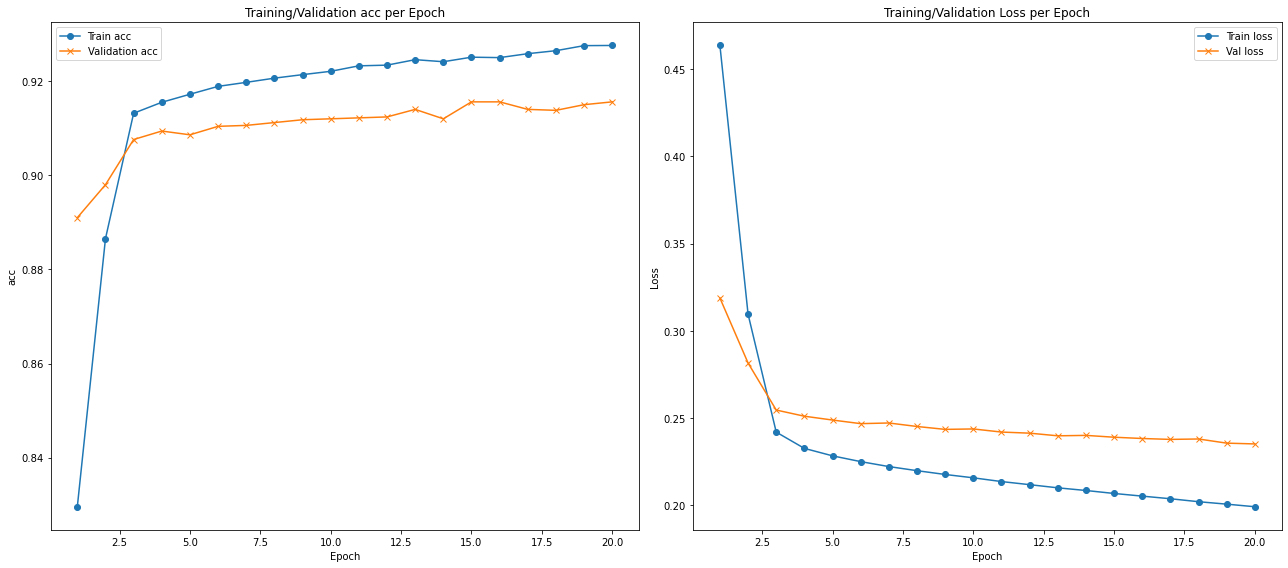

In [181]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist6.history['accuracy'], 'o-')
ax[0].plot([None] + hist6.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist6.history['loss'], 'o-')
ax[1].plot([None] + hist6.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

### Changing Optimizer

In [100]:
# Changing Optimizers 

model7 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model7.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_42 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_43 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_21 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 84)              

In [101]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model7.compile(loss='categorical_crossentropy', optimizer='Adamax',
               metrics=['accuracy']) 

In [102]:
hist7 = model7.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5082 - accuracy: 0.8155 - val_loss: 0.3945 - val_accuracy: 0.8636
Epoch 2/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.3535 - accuracy: 0.8720 - val_loss: 0.3056 - val_accuracy: 0.8924
Epoch 3/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.2935 - accuracy: 0.8947 - val_loss: 0.2972 - val_accuracy: 0.8952
Epoch 4/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.2882 - accuracy: 0.8969 - val_loss: 0.2939 - val_accuracy: 0.8968
Epoch 5/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.2855 - accuracy: 0.8975 - val_loss: 0.2931 - val_accuracy: 0.8956
Epoch 6/20
1719/1719 [==============================] - 26s 15ms/step - loss: 0.2835 - accuracy: 0.8983 - val_loss: 0.2925 - val_accuracy: 0.8960
Epoch 7/20
1719/1719 [==============================] - 25s 15ms/step - loss: 0.2819 - accuracy: 0.8996 - val_loss: 0.2904 -

In [103]:
score = model7.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 5ms/step - loss: 0.3058 - accuracy: 0.8918
Test loss: 0.3057733178138733
Test accuracy: 0.8917999863624573


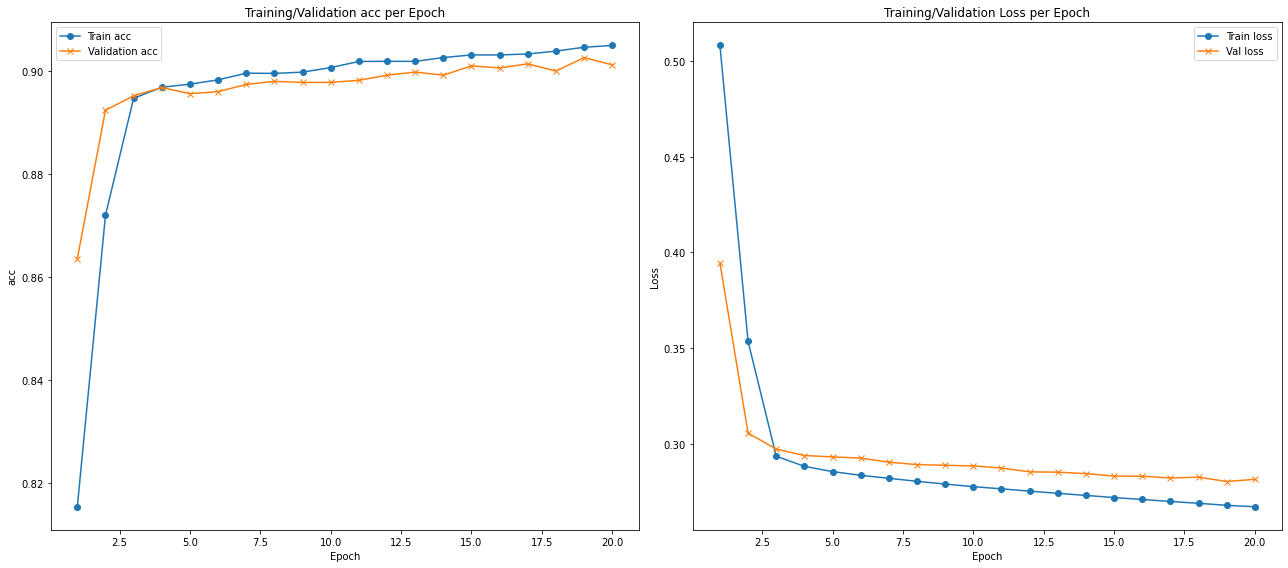

In [180]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist7.history['accuracy'], 'o-')
ax[0].plot([None] + hist7.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist7.history['loss'], 'o-')
ax[1].plot([None] + hist7.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [170]:

model8 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model8.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_99 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_66 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_100 (Conv2D)          (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_67 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_33 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 84)              

In [171]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model8.compile(loss='categorical_crossentropy', optimizer='SGD',
               metrics=['accuracy'])

In [172]:
hist8 = model8.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 23s 13ms/step - loss: 1.5029 - accuracy: 0.5945 - val_loss: 0.9042 - val_accuracy: 0.7022
Epoch 2/20
1719/1719 [==============================] - 23s 13ms/step - loss: 0.7846 - accuracy: 0.7256 - val_loss: 0.6838 - val_accuracy: 0.7434
Epoch 3/20
1719/1719 [==============================] - 23s 13ms/step - loss: 0.6975 - accuracy: 0.7439 - val_loss: 0.6776 - val_accuracy: 0.7524
Epoch 4/20
1719/1719 [==============================] - 22s 13ms/step - loss: 0.6945 - accuracy: 0.7480 - val_loss: 0.6759 - val_accuracy: 0.7538
Epoch 5/20
1719/1719 [==============================] - 23s 13ms/step - loss: 0.6923 - accuracy: 0.7488 - val_loss: 0.6738 - val_accuracy: 0.7548
Epoch 6/20
1719/1719 [==============================] - 23s 13ms/step - loss: 0.6903 - accuracy: 0.7493 - val_loss: 0.6718 - val_accuracy: 0.7550
Epoch 7/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.6883 - accuracy: 0.7503 - val_loss: 0.6699 -

In [173]:
score = model8.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.6811 - accuracy: 0.7473
Test loss: 0.6811357140541077
Test accuracy: 0.7473000288009644


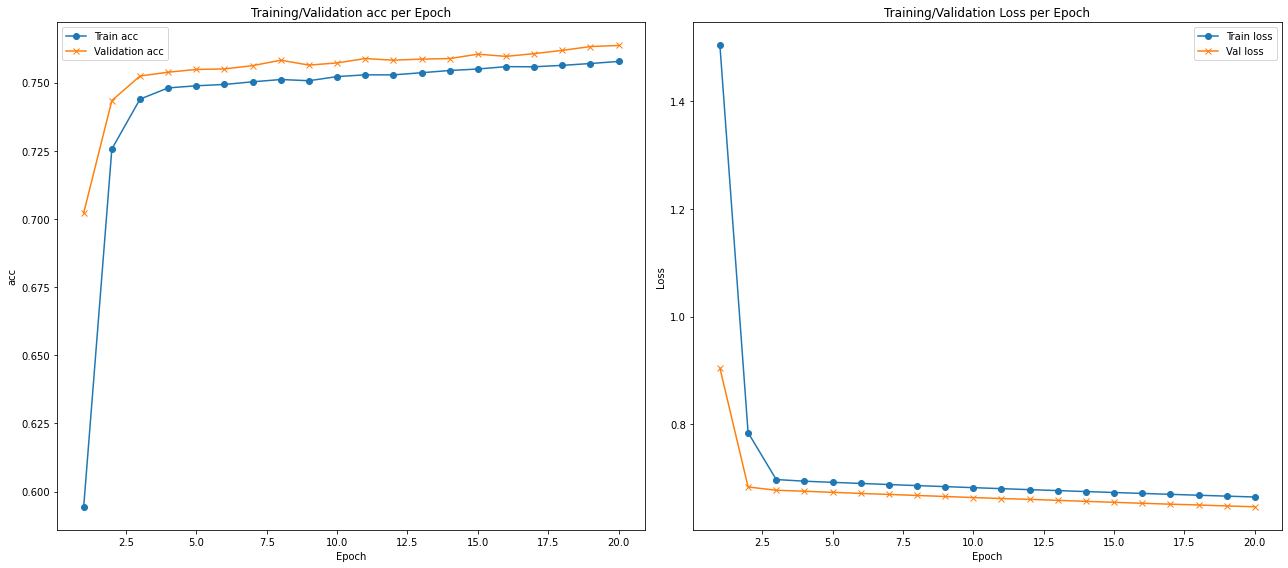

In [179]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist8.history['accuracy'], 'o-')
ax[0].plot([None] + hist8.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist8.history['loss'], 'o-')
ax[1].plot([None] + hist8.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [108]:
model9 = keras.models.Sequential([
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model9.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_46 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_47 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_23 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 84)              

In [111]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model9.compile(loss='categorical_crossentropy', optimizer='Adagrad',
               metrics=['accuracy'])

In [112]:
hist9 = model9.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 24s 14ms/step - loss: 1.0924 - accuracy: 0.6691 - val_loss: 0.6740 - val_accuracy: 0.7624
Epoch 2/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.6353 - accuracy: 0.7740 - val_loss: 0.5787 - val_accuracy: 0.7950
Epoch 3/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5915 - accuracy: 0.7888 - val_loss: 0.5761 - val_accuracy: 0.7962
Epoch 4/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5900 - accuracy: 0.7902 - val_loss: 0.5751 - val_accuracy: 0.7976
Epoch 5/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5891 - accuracy: 0.7907 - val_loss: 0.5742 - val_accuracy: 0.7990
Epoch 6/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5882 - accuracy: 0.7911 - val_loss: 0.5734 - val_accuracy: 0.7998
Epoch 7/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5875 - accuracy: 0.7914 - val_loss: 0.5728 -

In [113]:
score = model9.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 17ms/step - loss: 0.6024 - accuracy: 0.7833
Test loss: 0.6024214029312134
Test accuracy: 0.78329998254776


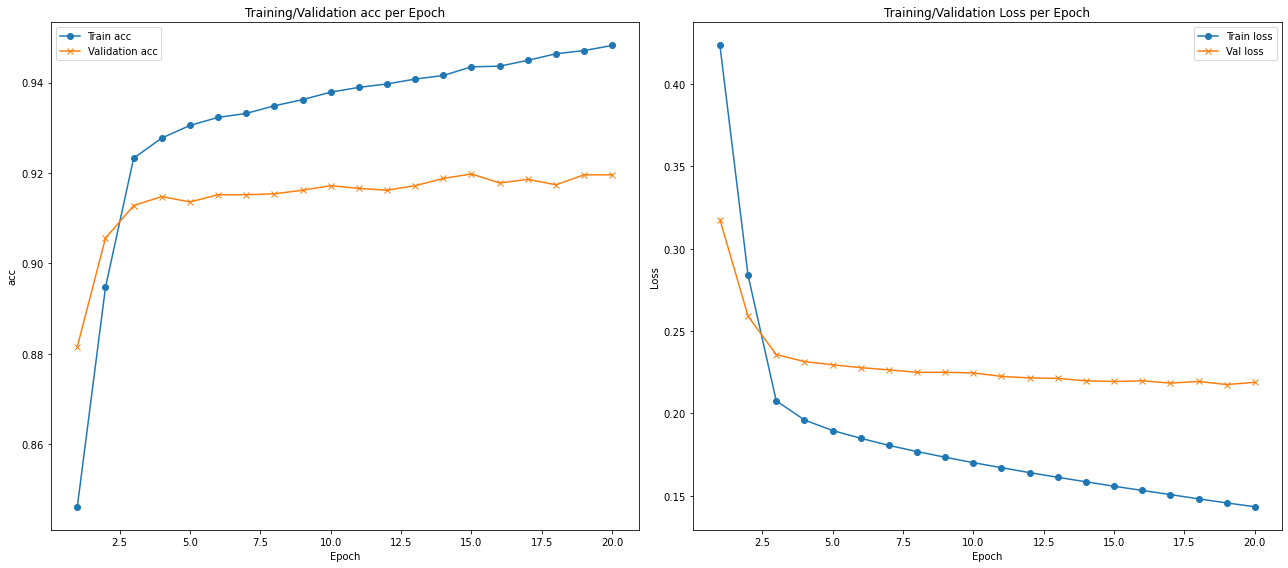

In [168]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist.history['accuracy'], 'o-')
ax[0].plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist.history['loss'], 'o-')
ax[1].plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

### Data Augmentation

In [115]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [118]:
IMG_SIZE = 28
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [124]:
model10 = keras.models.Sequential([
          
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),
          
          data_augmentation, resize_and_rescale,
          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),

          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model10.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_78 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 28, 28, 6)         0         
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 28, 28, 6)         0         
_________________________________________________________________
average_pooling2d_52 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_79 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_53 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 7, 7, 120)       

In [125]:
lr_sch = LearningRateScheduler(lr_schedule)

callbacks = lr_sch

model10.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])

In [126]:
hist10 = model10.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callbacks, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 33s 19ms/step - loss: 1.3414 - accuracy: 0.4903 - val_loss: 1.0592 - val_accuracy: 0.5852
Epoch 2/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.9747 - accuracy: 0.6387 - val_loss: 0.8638 - val_accuracy: 0.6818
Epoch 3/20
1719/1719 [==============================] - 32s 19ms/step - loss: 0.8489 - accuracy: 0.6923 - val_loss: 0.8354 - val_accuracy: 0.6912
Epoch 4/20
1719/1719 [==============================] - 32s 18ms/step - loss: 0.8418 - accuracy: 0.6935 - val_loss: 0.8319 - val_accuracy: 0.6928
Epoch 5/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.8361 - accuracy: 0.6968 - val_loss: 0.8267 - val_accuracy: 0.6930
Epoch 6/20
1719/1719 [==============================] - 33s 19ms/step - loss: 0.8330 - accuracy: 0.6981 - val_loss: 0.8199 - val_accuracy: 0.6964
Epoch 7/20
1719/1719 [==============================] - 34s 20ms/step - loss: 0.8277 - accuracy: 0.7004 - val_loss: 0.8170 -

In [128]:
score = model10.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.8000 - accuracy: 0.6988
Test loss: 0.8000346422195435
Test accuracy: 0.6988000273704529


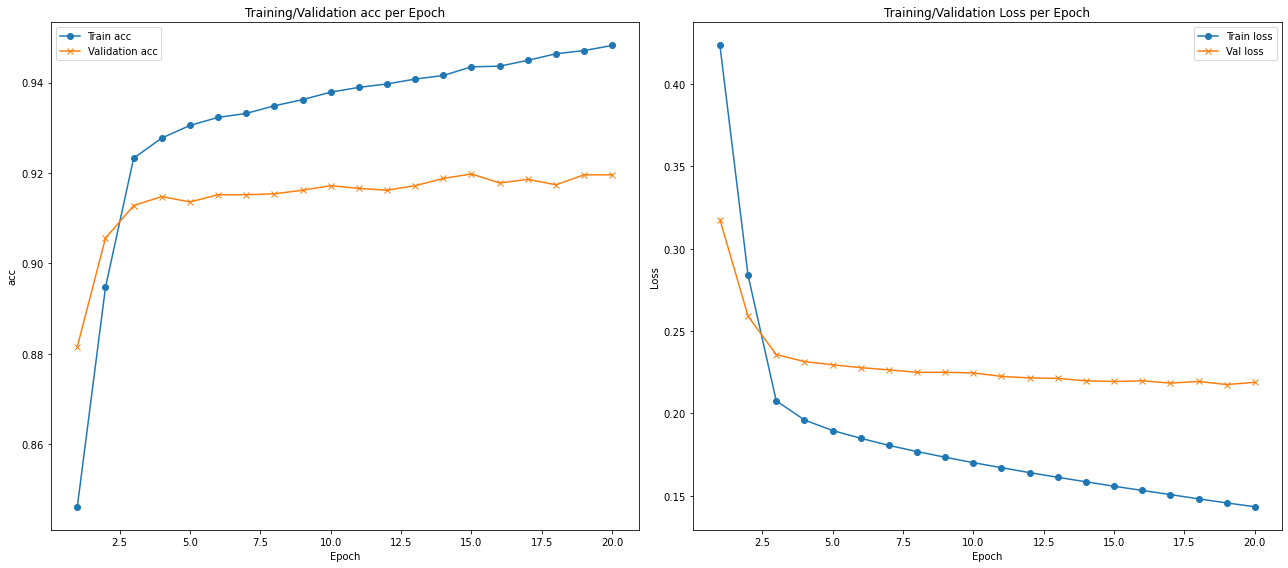

In [167]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist.history['accuracy'], 'o-')
ax[0].plot([None] + hist.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist.history['loss'], 'o-')
ax[1].plot([None] + hist.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

### Using earlystopping which gave more accuracy but I think it overfitted while training. 

In [162]:
model19 = keras.models.Sequential([
          
    
          keras.layers.Conv2D(filters=6, kernel_size=(3,3), 
                              strides=1, activation='relu', kernel_initializer='he_normal',
                              input_shape=(28,28,1), padding='same'),
          
          
          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=128, kernel_size=(3,3), 
                              strides=1, activation='relu',padding='same'),
          keras.layers.AveragePooling2D(pool_size=2, strides=2, padding='same'),

          keras.layers.Conv2D(filters=120, kernel_size=(3,3),  
                              strides=1, activation='relu',padding='same'),
                              
          keras.layers.Flatten(),
          keras.layers.Dense(units=84, activation='relu'),
          keras.layers.Dense(units=10, activation='softmax')
])

model19.summary()

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_93 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
average_pooling2d_62 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 14, 14, 128)       7040      
_________________________________________________________________
average_pooling2d_63 (Averag (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_95 (Conv2D)           (None, 7, 7, 120)         138360    
_________________________________________________________________
flatten_31 (Flatten)         (None, 5880)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 84)              

In [163]:
lr_sch = LearningRateScheduler(lr_schedule)

#callbacks = lr_sch
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model19.compile(loss='categorical_crossentropy', optimizer='adam',
               metrics=['accuracy'])

In [164]:
hist19 = model19.fit(X_train, y_train, batch_size= 32, epochs= 20, callbacks = callback, 
                 validation_data= (X_valid, y_valid), verbose = 1, shuffle= True)

Epoch 1/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.4167 - accuracy: 0.8482 - val_loss: 0.3140 - val_accuracy: 0.8850
Epoch 2/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.2708 - accuracy: 0.9014 - val_loss: 0.2356 - val_accuracy: 0.9134
Epoch 3/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.2240 - accuracy: 0.9183 - val_loss: 0.2266 - val_accuracy: 0.9146
Epoch 4/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1915 - accuracy: 0.9287 - val_loss: 0.2188 - val_accuracy: 0.9214
Epoch 5/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1618 - accuracy: 0.9405 - val_loss: 0.2211 - val_accuracy: 0.9224
Epoch 6/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1388 - accuracy: 0.9481 - val_loss: 0.2225 - val_accuracy: 0.9208
Epoch 7/20
1719/1719 [==============================] - 24s 14ms/step - loss: 0.1174 - accuracy: 0.9552 - val_loss: 0.2299 -

In [165]:
score = model19.evaluate(X_test, y_test, verbose = 1)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.5740 - accuracy: 0.9169
Test loss: 0.5739839673042297
Test accuracy: 0.9168999791145325


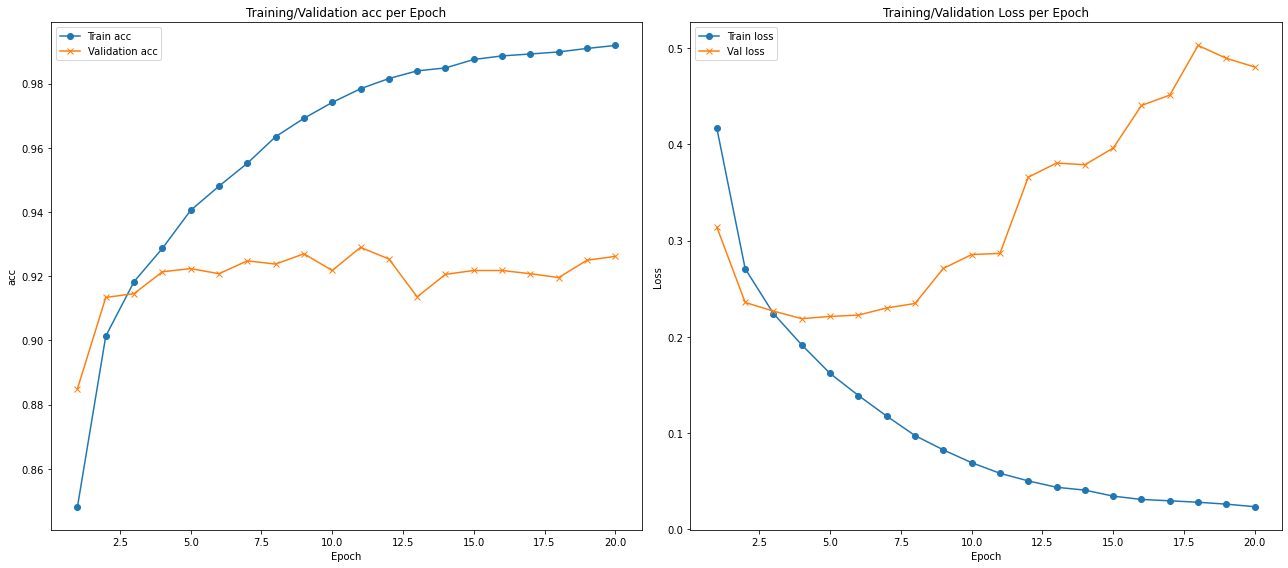

In [188]:
f, ax = plt.subplots(1, 2, figsize=[18, 8])
ax[0].plot([None] + hist19.history['accuracy'], 'o-')
ax[0].plot([None] + hist19.history['val_accuracy'], 'x-')
# Plot legend and use the best location automatically: loc = 0.
ax[0].legend(['Train acc', 'Validation acc'], loc = 0)
ax[0].set_title('Training/Validation acc per Epoch')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('acc')

ax[1].plot([None] + hist19.history['loss'], 'o-')
ax[1].plot([None] + hist19.history['val_loss'], 'x-')

# Plot legend and use the best location automatically: loc = 0.
ax[1].legend(['Train loss', "Val loss"], loc = 0)
ax[1].set_title('Training/Validation Loss per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')

plt.tight_layout()
plt.show()

### Resources 
### www.kaggle.com
### www.medium.com
### www.towardsdatascience.com
### https://keras.io/
### https://stackoverflow.com/
### https://machinelearningmastery.com/
### www.analyticsvidhya.com